# exp_epupd_0 EP update >= 0 エントリ（ベースライン） 集計

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import os
import re

import numpy as np
import pandas as pd
from matplotlib import (
    font_manager as fm,
    pyplot as plt,
)
import seaborn as sns

from funcs.common import add_data_af

In [16]:
name_doe = 'exp_epupd_0'
dir_path = '../doe/%s' % name_doe
list_date = sorted(
    [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]
)
print(list_date)

['2025-03-19', '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-31', '2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-14', '2025-04-15', '2025-04-16', '2025-04-17', '2025-04-18', '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24', '2025-04-25', '2025-04-28', '2025-04-30']


In [17]:
pattern = re.compile(r'summary.*_([0-9a-z]{4}).*\.html')
df_7011 = pd.DataFrame()
df_7203 = pd.DataFrame()
df_8306 = pd.DataFrame()

dict_html = dict()

for date in list_date:
    print(date)
    for f in sorted(os.listdir(os.path.join(dir_path, date))):
        m = pattern.match(f)
        if m:
            code = m.group(1)
            dict_html[code] = f

    for code in dict_html.keys():
        tbl = pd.read_html(os.path.join(dir_path, date, dict_html[code]))
        if code == '7011':
            add_data_af(df_7011, tbl[0], date)
        elif code == '7203':
            add_data_af(df_7203, tbl[0], date)
        elif code == '8306':
            add_data_af(df_8306, tbl[0], date)
        else:
            pass

#print(df_7011)
#print(df_7203)
#print(df_8306)

2025-03-19
2025-03-21
2025-03-24
2025-03-25
2025-03-26
2025-03-27
2025-03-28
2025-03-31
2025-04-01
2025-04-02
2025-04-03
2025-04-04
2025-04-07
2025-04-08
2025-04-09
2025-04-10
2025-04-11
2025-04-14
2025-04-15
2025-04-16
2025-04-17
2025-04-18
2025-04-21
2025-04-22
2025-04-23
2025-04-24
2025-04-25
2025-04-28
2025-04-30


In [18]:
df_sum = pd.DataFrame()
df_sum['af_init'] = df_7011['af_init']
df_sum['af_step'] = df_7011['af_step']
df_sum['af_max'] = df_7011['af_max']
df_sum

,af_init,af_step,af_max
0,0.0,0.00005,0.005
1,0.0,0.00010,0.010
2,0.0,0.00015,0.015
3,0.0,0.00020,0.020
4,0.0,0.00025,0.025
5,0.0,0.00030,0.030
6,0.0,0.00035,0.035
7,0.0,0.00040,0.040
8,0.0,0.00045,0.045
9,0.0,0.00050,0.050


## AF step vs. Profit (total)

In [19]:
df_sum['7011'] = df_7011.sum(axis=1)
df_sum['7203'] = df_7203.sum(axis=1)
df_sum['8306'] = df_8306.sum(axis=1)
df_sum

,af_init,af_step,af_max,7011,7203,8306
0,0.0,0.00005,0.005,22850.00505,29800.00505,18450.00505
1,0.0,0.00010,0.010,19050.01010,11250.01010,25700.01010
2,0.0,0.00015,0.015,12750.01515,10250.01515,7000.01515
3,0.0,0.00020,0.020,400.02020,-15599.97980,-3949.97980
4,0.0,0.00025,0.025,2350.02525,-23249.97475,3300.02525
5,0.0,0.00030,0.030,-4899.96970,10700.03030,-13149.96970
6,0.0,0.00035,0.035,24000.03535,16450.03535,13600.03535
7,0.0,0.00040,0.040,19500.04040,-7699.95960,21250.04040
8,0.0,0.00045,0.045,15550.04545,-849.95455,7150.04545
9,0.0,0.00050,0.050,16400.05050,-23849.94950,13900.05050


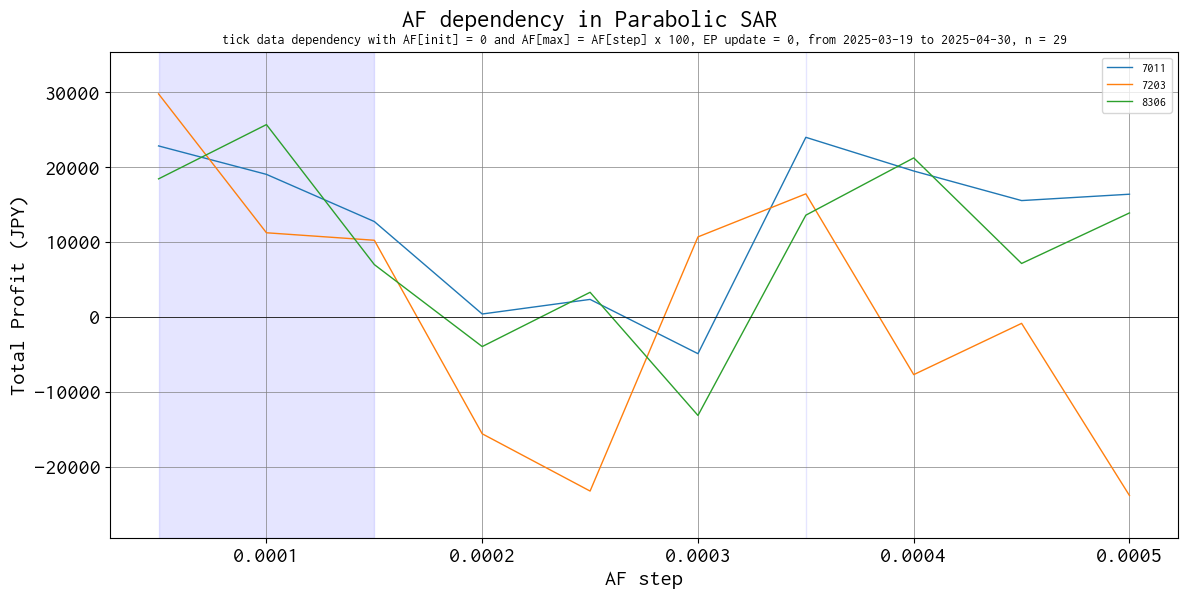

In [20]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

x = df_sum['af_step']
y = dict()
for i, code in enumerate(['7011', '7203', '8306']):
    y[i] = df_sum[code]
    ax.plot(x, y[i], label='%s' % code, lw=1)

threshold = 0
ax.fill_between(
    x, 0, 1,
    where=(y[0] > threshold) & (y[1] > threshold) & (y[2] > threshold),
    color='blue',
    alpha=0.1,
    transform=ax.get_xaxis_transform()
)

ax.axhline(0, color='black', lw=0.5)
#ax.set_xscale('log')
ax.grid(which='major', color='gray',linestyle='-', linewidth=0.5)
ax.grid(which='minor', color='gray',linestyle='dotted', linewidth=0.5)

ax.set_xlabel('AF step')
ax.set_ylabel('Total Profit (JPY)')
ax.legend(fontsize=9)

ax.set_title(
    'tick data dependency with AF[init] = 0 and AF[max] = AF[step] x 100, EP update = 0, from %s to %s, n = %d' % (
        list_date[0], list_date[len(list_date) - 1], len(list_date)
    ),
    fontsize=10
)

plt.suptitle('AF dependency in Parabolic SAR', fontsize=18)
plt.subplots_adjust(left=0.1, right=0.99, bottom=0.1, top=0.91)
plt.savefig('./%s/total.png' % name_doe)
plt.show()

## Seaborn 用にデータセットを準備

stack() を使わないのか？

https://note.nkmk.me/python-pandas-stack-unstack-pivot/

In [21]:
df = pd.DataFrame()
#code = ['7011', '7203', '8306']
#df_code = [df_7011, df_7203, df_8306]
for code, df_code in zip(['7011', '7203', '8306'], [df_7011, df_7203, df_8306]):
    for date in list_date:
        for af_step in df_code['af_step']:
            profit = df_code[df_code['af_step'] == af_step][date].iloc[0]
            r = len(df)
            df.loc[r, 'af_step'] = af_step
            df.loc[r, 'code'] = code
            df.loc[r, 'date'] = date
            df.loc[r, 'profit'] = profit
df

,af_step,code,date,profit
0,0.00005,7011,2025-03-19,-2200.0
1,0.00010,7011,2025-03-19,-2500.0
2,0.00015,7011,2025-03-19,-850.0
3,0.00020,7011,2025-03-19,-1450.0
4,0.00025,7011,2025-03-19,-1650.0
...,...,...,...,...
865,0.00030,8306,2025-04-30,-5050.0
866,0.00035,8306,2025-04-30,-5800.0
867,0.00040,8306,2025-04-30,-1750.0
868,0.00045,8306,2025-04-30,-4000.0


## Boxplot

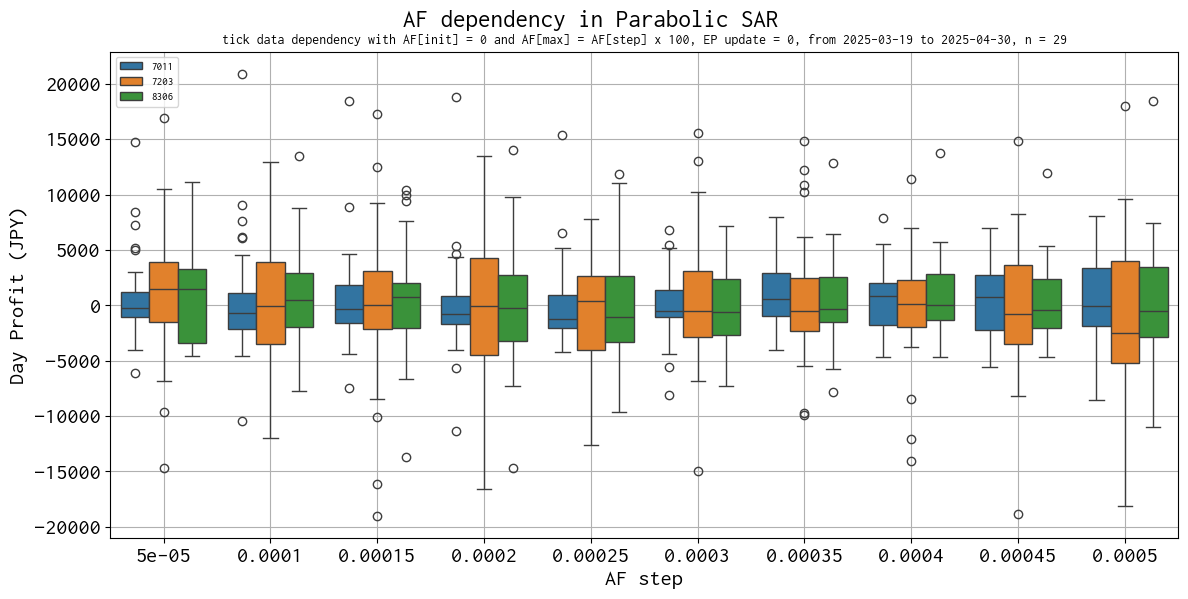

In [22]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

sns.boxplot(data=df, x='af_step', y='profit', hue='code', ax=ax)
ax.set_xlabel('AF step')
ax.set_ylabel('Day Profit (JPY)')
ax.legend(fontsize=8)

ax.grid()

ax.set_title(
    'tick data dependency with AF[init] = 0 and AF[max] = AF[step] x 100, EP update = 0, from %s to %s, n = %d' % (
        list_date[0], list_date[len(list_date) - 1], len(list_date)
    ),
    fontsize=10
)

plt.suptitle('AF dependency in Parabolic SAR', fontsize=18)
plt.subplots_adjust(left=0.1, right=0.99, bottom=0.1, top=0.91)
plt.savefig('./%s/boxplot.png' % name_doe)
plt.show()